In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

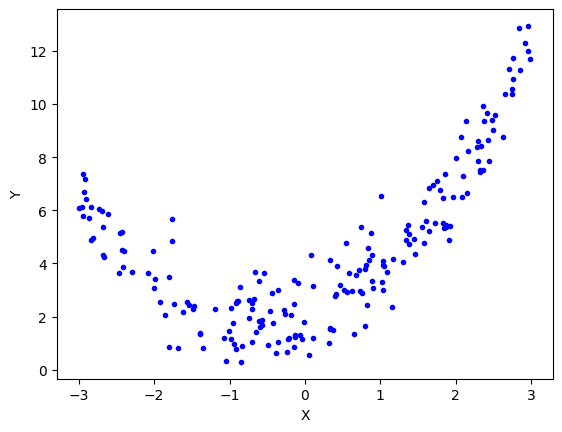

In [79]:
x = 6* np.random.rand(200, 1)-3
y = 0.8*x**2 + 0.9*x + 2 +np.random.randn(200,1)

plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [80]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
lr = LinearRegression()

In [81]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("R2 score for Linear Regression:", r2_score(y_test, y_pred))

R2 score for Linear Regression: 0.42367978824131114


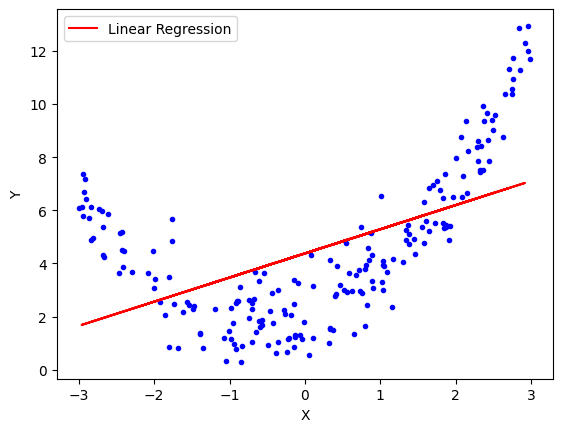

In [82]:
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x_test, y_pred, label='Linear Regression',color='red')
plt.legend()
plt.show()

In [83]:
poly = PolynomialFeatures(degree=2,include_bias=False)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [84]:
print('\n '.join(f"{a} -> {b}" for a, b in zip(x_train[:5], x_train_trans[:5])))


[-0.24033478] -> [-0.24033478  0.05776081]
 [-1.73225782] -> [-1.73225782  3.00071716]
 [-1.80309934] -> [-1.80309934  3.25116723]
 [-0.12753553] -> [-0.12753553  0.01626531]
 [-0.18785805] -> [-0.18785805  0.03529065]


In [85]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [86]:
y_pred = lr.predict(x_test_trans)
print("R2 score for Linear Regression:", r2_score(y_test, y_pred))

R2 score for Linear Regression: 0.8676688679224972


In [87]:
print(lr.coef_,lr.intercept_)

[[0.92738338 0.8186853 ]] [1.93984488]


In [88]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

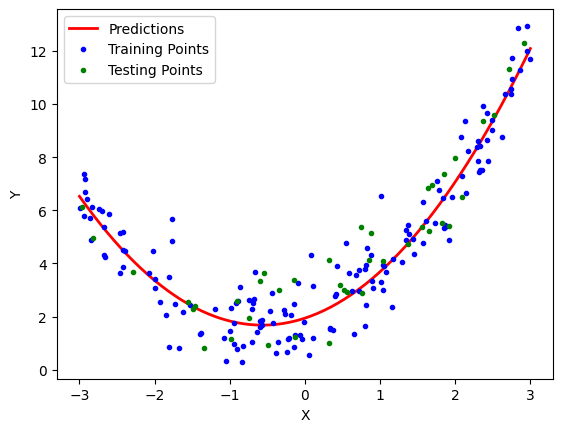

In [89]:
plt.plot(x_new,y_new, 'r-',linewidth=2,label = "Predictions")
plt.plot(x_train,y_train,'b.',label="Training Points")
plt.plot(x_test,y_test,'g.',label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [90]:
def ploynomial_regression(degree=2):
  x_new = np.linspace(-3, 3, 200).reshape(200, 1)
  x_new_poly = poly.transform(x_new)

  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  ploynomial_regression = Pipeline([
      ("poly_features", polybig_features),
      ("std_scaler", std_scaler),
      ("lin_reg", lin_reg)
  ])
  ploynomial_regression.fit(x,y)
  y_newbig = ploynomial_regression.predict(x_new)
  plt.plot(x_new,y_newbig,'r',label="Degree" + str(degree),linewidth=2)
  plt.plot(x_train,y_train,'b.',label="Training Points")
  plt.plot(x_test,y_test,'g.',label="Testing Points")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend(loc="upper left")
  plt.title("Polynomial Regression with degree " + str(degree))
  plt.axis([-3, 3, -1, 10])
  plt.show()


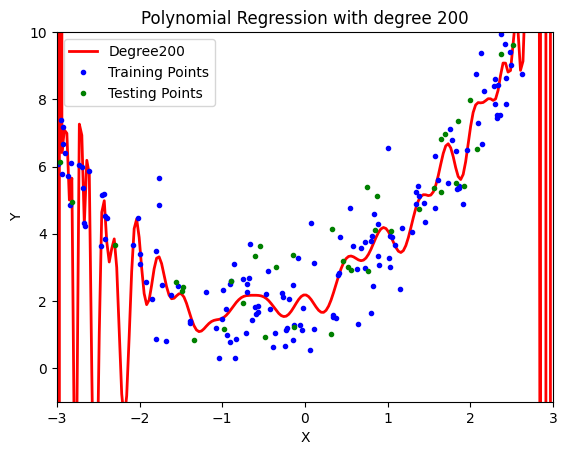

In [91]:
ploynomial_regression(200)

In [92]:
#3d polynomial regression
x = 7* np.random.rand(100, 1) - 2.8
y = 7* np.random.rand(100, 1) - 2.8

z = x**2 +y**2 + 0.5*x + 0.5*y + 0.1*x*y + 1 + np.random.randn(100, 1)

In [93]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x = x.ravel(), y = y.ravel(), z = z.ravel())
fig.show()

In [94]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid,yGrid = np.meshgrid(x_input,y_input)
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [95]:
import plotly.graph_objects as go
fig = px.scatter_3d(df,x = x.ravel(),y = y.ravel(),z = z.ravel())
fig.add_trace(go.Surface(x=x_input,y = y_input,z = z_final))
fig.show()

In [106]:
x_multi = np.array([x,y]).reshape(100,2)
poly = PolynomialFeatures(degree=4)
x_multi_trans = poly.fit_transform(x_multi)

In [107]:
print("Input",poly.n_features_in_)
print("Output",poly.n_output_features_)
print("Powers",poly.powers_)

Input 2
Output 15
Powers [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]]


In [108]:
lr = LinearRegression()
lr.fit(x_multi_trans, z)
x_test_multi = poly.transform(final)
z_pred = lr.predict(x_multi_trans).reshape(10, 10)

In [109]:
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_pred))